# Descarga de los datasets

In [1]:
# Descarga el dataset de imagenes no etiquetadas
!gdown "https://drive.google.com/uc?export=download&id=12ELJm48gudZApmxozqqeg4JL5HInDauU"

Downloading...
From: https://drive.google.com/uc?export=download&id=12ELJm48gudZApmxozqqeg4JL5HInDauU
To: /content/images_tr.rar
342MB [00:04, 68.4MB/s]


In [2]:
# Descarga el dataset de imagenes etiquetadas
!gdown "https://drive.google.com/uc?export=download&id=12N6rBvzncffWGx2AjtJ8BAgPw4lQ__xz"

Downloading...
From: https://drive.google.com/uc?export=download&id=12N6rBvzncffWGx2AjtJ8BAgPw4lQ__xz
To: /content/images_label_tr.rar
776MB [00:13, 55.9MB/s]


In [3]:
# instala el compresor
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 1s (206 kB/s)
Selecting previously unselected package rar.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
# extrae los archivos
! rar x 'images_tr.rar'
! rar x 'images_label_tr.rar'

Se han truncado las últimas 5000 líneas del flujo de salida.
Extracting  images_tr/22/spleen_22.ni_z146.png                            67%  OK 
Extracting  images_tr/22/spleen_22.ni_z081.png                            67%  OK 
Extracting  images_tr/22/spleen_22.ni_z028.png                            67%  OK 
Extracting  images_tr/22/spleen_22.ni_z016.png                            67%  OK 
Extracting  images_tr/22/spleen_22.ni_z126.png                            67%  OK 
Extracting  images_tr/22/spleen_22.ni_z050.png                            67%  OK 
Extracting  images_tr/22/spleen_22.ni_z056.png                            67%  OK 
Extracting  images_tr/22/spleen_22.ni_z104.png                            67%  OK 
Extracting  images_tr/22/spleen_22.ni_z054.png                            67%  OK 
Extracting  images_tr/22/spleen_22.ni_z107.png                            67%  OK 
Extracting  images_

# Carga el modelo

In [5]:
# descarga el modelo
!wget http://data.csail.mit.edu/places/medical/pretrained/2class/resnet152/checkpoint_00000005.pth.tar -P resnet152

--2020-07-22 03:17:45--  http://data.csail.mit.edu/places/medical/pretrained/2class/resnet152/checkpoint_00000005.pth.tar
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 465959968 (444M) [application/octet-stream]
Saving to: ‘resnet152/checkpoint_00000005.pth.tar’

checkpoint_00000005 100%[===================>] 444.37M  10.8MB/s    in 1m 41s  

2020-07-22 03:19:27 (4.40 MB/s) - ‘resnet152/checkpoint_00000005.pth.tar’ saved [465959968/465959968]



In [6]:
# load the model
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

In [7]:
model = models.resnet152(pretrained=True)
model.fc = nn.Linear(2048, 2)
model = torch.nn.DataParallel(model).cuda()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [8]:
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(),
                                lr=0.0001,
                                momentum=0.9,
                                weight_decay=0.0001)
start_epoch = 0

In [9]:
checkpoint = torch.load('resnet152/checkpoint_00000005.pth.tar',map_location='cpu')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

In [10]:
model.eval()

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

# Check sizes

In [11]:
# importa las librerias que se usan para carga
import numpy as np
import torchvision
from matplotlib import pyplot as plt
from matplotlib.image import imread
from matplotlib import colors as clt

### Imagen etiquetada

In [12]:
img = imread("images_label_tr/10/label_spleen_10.ni_z001.png")
type(img)

numpy.ndarray

In [13]:
img.shape

(512, 512, 3)

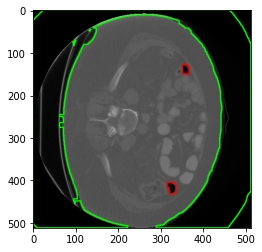

In [14]:
plt.imshow(img)

### Imagen no etiquetada

In [15]:
img2 = imread("images_tr/10/spleen_10.ni_z001.png")
type(img2)

numpy.ndarray

In [16]:
img2.shape

(512, 512)

In [17]:
imgf=img
for x in range(512):
  for y in range(512):  
    imgf[x][y] = np.array([img2[x][y],img2[x][y],img2[x][y]])

In [18]:
imgf.shape

(512, 512, 3)

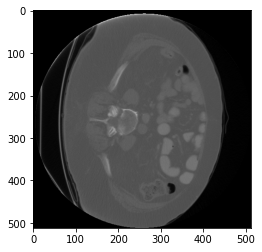

In [19]:
plt.imshow(imgf)

# Preprocesamiento de los inputs y outputs

In [39]:
from torchsummary import summary
from torchvision import transforms
from torch.autograd import Variable
from PIL import Image

In [63]:
# Se añade 1 capa al inicio para ingresar imagenes en blanco y negro
# Se eliminan las 2 primeras capas del modelo preentrenado
model2 = nn.Sequential(nn.Conv2d(1,3, kernel_size=(1, 1), stride=(1, 1), bias=True),
                       nn.Sequential(*list(list(model.children())[0].children())[:-2]),
                       #16x16x2048
                       nn.Conv2d(2048,1024,kernel_size=3, padding=1),
                       #16x16x1024
                       #nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                       nn.ReLU(),
                       nn.Upsample(scale_factor=2),
                       #32x32x1024
                       nn.Conv2d(1024,512,kernel_size=3, padding=1),
                       #32x32x512
                       #nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                       nn.ReLU(),
                       nn.Upsample(scale_factor=2),
                       #64x64x512
                       nn.Conv2d(512,256,kernel_size=3, padding=1),
                       #64x64x256
                       #nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                       nn.ReLU(),
                       nn.Upsample(scale_factor=2),
                       #128x128x256
                       nn.Conv2d(256,128,kernel_size=3, padding=1),
                       #128x128x128
                       #nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                       nn.ReLU(),
                       nn.Upsample(scale_factor=2),
                       #256x256x128
                       nn.Conv2d(128,64,kernel_size=3, padding=1),
                       #256x256x64
                       #nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                       nn.ReLU(),
                       nn.Upsample(scale_factor=2),
                       #512x512x64
                       nn.Conv2d(64,3,kernel_size=3, padding=1),
                       #nn.ReLU(),
                       #512x512x3
                       )

In [64]:
model2 = torch.nn.DataParallel(model2).cuda()

In [42]:
image_input = Image.open('images_tr/10/spleen_10.ni_z001.png')

# Define transformations for the image, should (note that imagenet models are trained with image size 224)
transformation = transforms.Compose([
    transforms.CenterCrop(512),
    transforms.ToTensor(),
])

# Preprocess the image
image_input_tensor = transformation(image_input).float()

# Add an extra batch dimension since pytorch treats all images as batches
image_input_tensor = image_input_tensor.unsqueeze_(0)

if torch.cuda.is_available():
    image_input_tensor.cuda()

# Turn the input into a Variable
input = Variable(image_input_tensor)

In [43]:
image_output = Image.open('images_label_tr/10/label_spleen_10.ni_z001.png')

# Define transformations for the image, should (note that imagenet models are trained with image size 224)
transformation = transforms.Compose([
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Preprocess the image
image_output_tensor = transformation(image_output).float()

# Add an extra batch dimension since pytorch treats all images as batches
image_output_tensor = image_output_tensor.unsqueeze_(0)

if torch.cuda.is_available():
    image_output_tensor.cuda()

# Turn the input into a Variable
output = Variable(image_output_tensor)

Inspeccionando los tamaños

In [44]:
response = model2(input)

In [45]:
input.size()

torch.Size([1, 1, 512, 512])

In [46]:
response.size()

torch.Size([1, 3, 512, 512])

In [47]:
output.size()

torch.Size([1, 3, 512, 512])

In [48]:
summary(model2, (1,512,512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 512, 512]               6
            Conv2d-2         [-1, 64, 256, 256]           9,408
       BatchNorm2d-3         [-1, 64, 256, 256]             128
              ReLU-4         [-1, 64, 256, 256]               0
         MaxPool2d-5         [-1, 64, 128, 128]               0
            Conv2d-6         [-1, 64, 128, 128]           4,096
       BatchNorm2d-7         [-1, 64, 128, 128]             128
              ReLU-8         [-1, 64, 128, 128]               0
            Conv2d-9         [-1, 64, 128, 128]          36,864
      BatchNorm2d-10         [-1, 64, 128, 128]             128
             ReLU-11         [-1, 64, 128, 128]               0
           Conv2d-12        [-1, 256, 128, 128]          16,384
      BatchNorm2d-13        [-1, 256, 128, 128]             512
           Conv2d-14        [-1, 256, 1

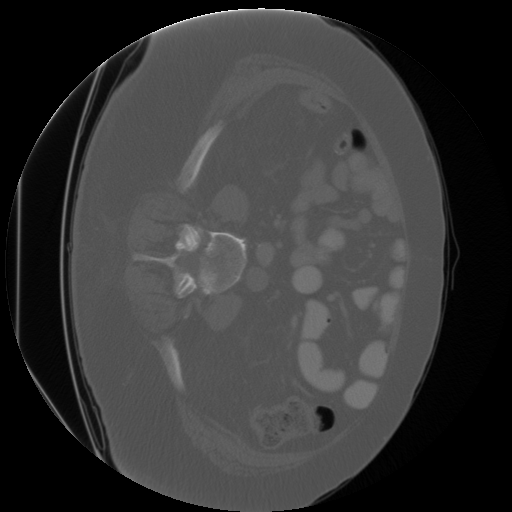

In [30]:
from torchvision import transforms
im = transforms.ToPILImage()(input.squeeze_(0).cpu())
display(im)

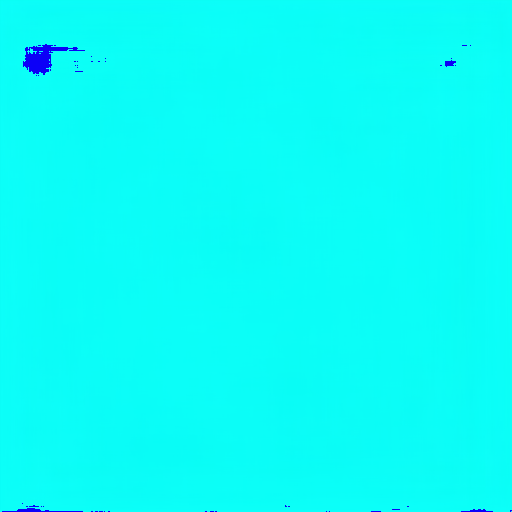

In [31]:
from torchvision import transforms
im = transforms.ToPILImage()(response.squeeze_(0).cpu())
display(im)

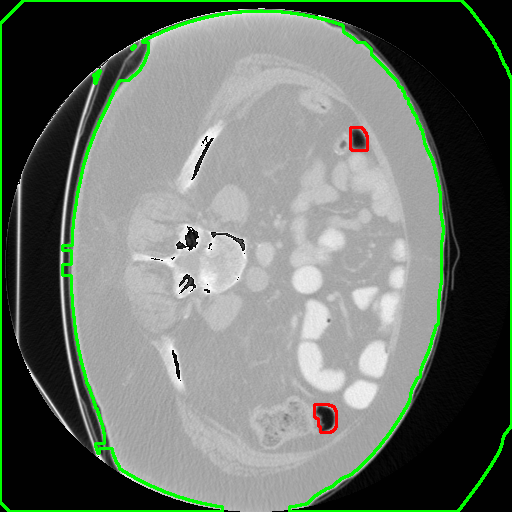

In [32]:
from torchvision import transforms
im = transforms.ToPILImage()(output.squeeze_(0).cpu())
display(im)

# Entrenamiento

In [49]:
def to_tensor_input(image_input):
  # Define transformations for the image, should (note that imagenet models are trained with image size 224)
  transformation = transforms.Compose([
      transforms.CenterCrop(512),
      transforms.ToTensor(),
  ])

  # Preprocess the image
  image_input_tensor = transformation(image_input).float()

  # Add an extra batch dimension since pytorch treats all images as batches
  image_input_tensor = image_input_tensor.unsqueeze_(0)

  # Turn the input into a Variable
  return Variable(image_input_tensor)

In [50]:
def to_tensor_output(image_output):
  # Define transformations for the image, should (note that imagenet models are trained with image size 224)
  transformation = transforms.Compose([
      transforms.CenterCrop(512),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
  ])

  # Preprocess the image
  image_output_tensor = transformation(image_output).float()

  # Add an extra batch dimension since pytorch treats all images as batches
  image_output_tensor = image_output_tensor.unsqueeze_(0)

  # Turn the input into a Variable
  return Variable(image_output_tensor)

In [51]:
import os, sys
import glob

X_paths = []
Y_paths = []

dirs = os.listdir('images_tr')
for dir in dirs:
  dirs_temp = os.listdir('images_tr/'+dir)
  for dir2 in dirs_temp:
    X_paths.append('images_tr/'+dir+'/'+dir2)
    Y_paths.append('images_label_tr/'+dir+'/label_'+dir2)

In [67]:
criterion = nn.MSELoss().cuda()
#optimizer = torch.optim.Adam(model2.parameters(),lr=0.001)
optimizer = torch.optim.Adagrad(model2.parameters(), lr=0.001, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
loss_values = []
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for i in range(len(X_paths)):
        # zero the parameter gradients
        optimizer.zero_grad()
        image = Image.open(X_paths[i])
        image2 = Image.open(Y_paths[i])
        # forward + backward + optimize
        outputs = model2(to_tensor_input(image).cuda())
        loss = criterion(outputs, to_tensor_output(image2).cuda())
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        loss_values.append(running_loss)
        if i % 10 == 9:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss /10))
            running_loss = 0.0
print('Finished Training')

[1,    10] loss: 17.379
[1,    20] loss: 13.531
[1,    30] loss: 10.247
[1,    40] loss: 0.442
[1,    50] loss: 0.464
[1,    60] loss: 0.393
[1,    70] loss: 0.351
[1,    80] loss: 0.251
[1,    90] loss: 0.188
[1,   100] loss: 0.178
[1,   110] loss: 0.170
[1,   120] loss: 0.139
[1,   130] loss: 0.104
[1,   140] loss: 0.094
[1,   150] loss: 0.074
[1,   160] loss: 0.067
[1,   170] loss: 0.056
[1,   180] loss: 0.055
[1,   190] loss: 0.064
[1,   200] loss: 0.053
[1,   210] loss: 0.065
[1,   220] loss: 0.054
[1,   230] loss: 0.074
[1,   240] loss: 0.070
[1,   250] loss: 0.065
[1,   260] loss: 0.068
[1,   270] loss: 0.068
[1,   280] loss: 0.070
[1,   290] loss: 0.074
[1,   300] loss: 0.055
[1,   310] loss: 0.057
[1,   320] loss: 0.053
[1,   330] loss: 0.072
[1,   340] loss: 0.044
[1,   350] loss: 0.047
[1,   360] loss: 0.043
[1,   370] loss: 0.049
[1,   380] loss: 0.056
[1,   390] loss: 0.048
[1,   400] loss: 0.040
[1,   410] loss: 0.042
[1,   420] loss: 0.044
[1,   430] loss: 0.051
[1,   44

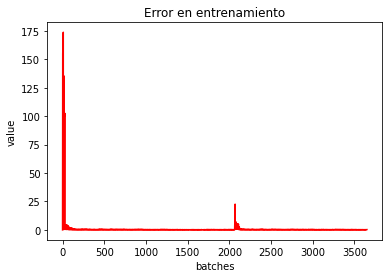

In [68]:
# Se muestra grafica de training
plt.title('Error en entrenamiento')
plt.xlabel('batches')
plt.ylabel('value')
plt.plot(np.array(loss_values), 'r')

# Visualizacion

In [69]:
image_input = Image.open('images_tr/12/spleen_12.ni_z006.png')

# Define transformations for the image, should (note that imagenet models are trained with image size 224)
transformation = transforms.Compose([
    transforms.CenterCrop(512),
    transforms.ToTensor(),
])

# Preprocess the image
image_input_tensor = transformation(image_input).float()

# Add an extra batch dimension since pytorch treats all images as batches
image_input_tensor = image_input_tensor.unsqueeze_(0)

if torch.cuda.is_available():
    image_input_tensor.cuda()

# Turn the input into a Variable
input = Variable(image_input_tensor)

In [70]:
response = model2(input)
torch.set_printoptions(profile="full")

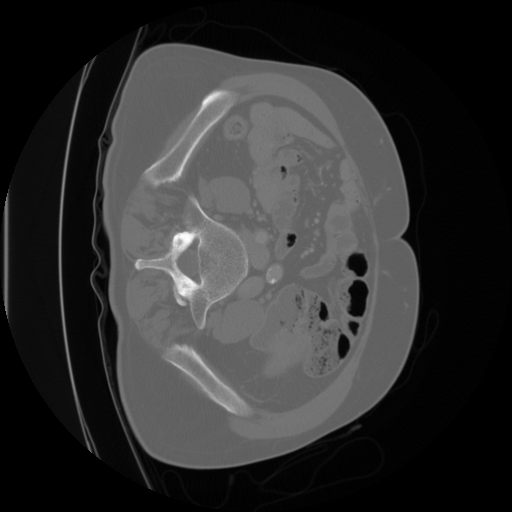

In [71]:
im = transforms.ToPILImage()(input.squeeze_(0).cpu())
display(im)

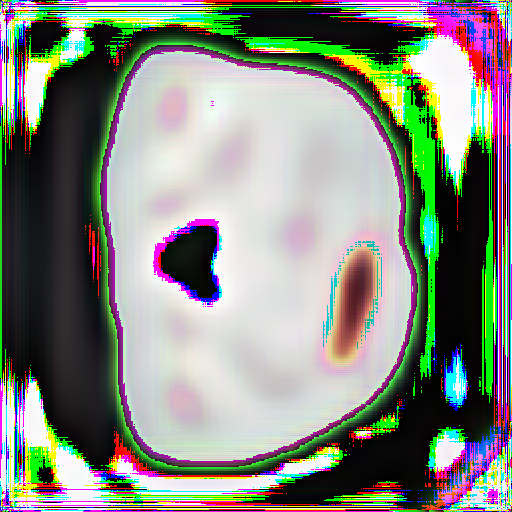

In [72]:
from torchvision import transforms
im = transforms.ToPILImage()(response.squeeze_(0).cpu())
display(im)

In [73]:
torch.save(model2, 'modelito')

In [74]:
model3 = torch.load('modelito')
model3.eval()

DataParallel(
  (module): Sequential(
    (0): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1))
    (1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [75]:
image_input = Image.open('images_tr/10/spleen_10.ni_z006.png')

# Define transformations for the image, should (note that imagenet models are trained with image size 224)
transformation = transforms.Compose([
    transforms.CenterCrop(512),
    transforms.ToTensor(),
])

# Preprocess the image
image_input_tensor = transformation(image_input).float()

# Add an extra batch dimension since pytorch treats all images as batches
image_input_tensor = image_input_tensor.unsqueeze_(0)

if torch.cuda.is_available():
    image_input_tensor.cuda()

# Turn the input into a Variable
input = Variable(image_input_tensor)
response = model3(input)


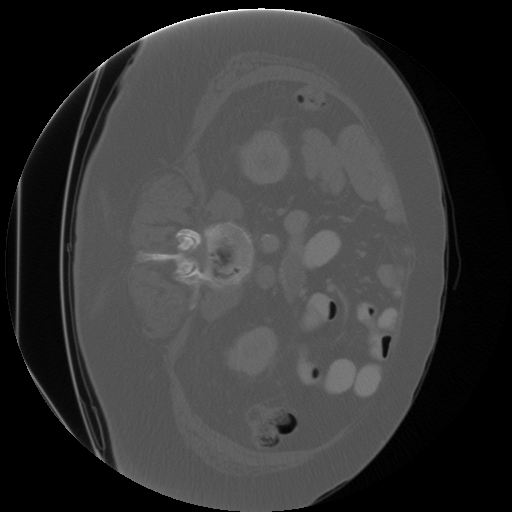

In [76]:
im = transforms.ToPILImage()(input.squeeze_(0).cpu())
display(im)

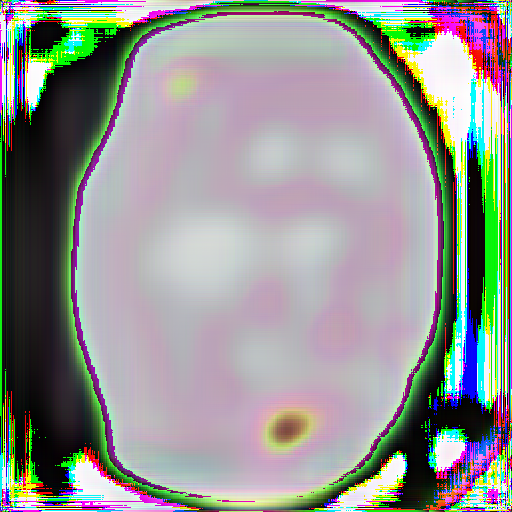

In [77]:
from torchvision import transforms
im = transforms.ToPILImage()(response.squeeze_(0).cpu())
display(im)